## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Reading Dataset

In [2]:
df = pd.read_csv('../data/wine_data.csv')
print(df.shape)
df.head()

(21000, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [3]:
df['out'] = df['quality'] >= 6
df['out'] = pd.Series(df['out']).astype(int)
df.sample(5)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,out
20031,11.7,1.25,1.20,56.7,0.203,152.9,254.2,1.02289,3.12,1.17,11.4,9,1
14144,12.4,1.14,1.10,57.4,0.408,269.1,359.5,1.02467,3.17,1.14,10.7,7,1
2590,11.1,0.98,0.87,45.6,0.451,62.6,337.2,1.00899,3.15,1.38,12.0,3,0
5232,11.2,0.63,1.40,48.8,0.154,211.3,237.0,1.01496,3.42,1.29,10.1,4,0
1593,10.5,0.81,1.20,25.2,0.220,136.8,297.2,1.00347,3.53,1.10,12.2,3,0


In [4]:
inputs = df.drop(columns='quality')
inputs.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,out
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0


In [5]:
inputs = inputs.to_numpy()
inputs

array([[11.6  ,  0.58 ,  0.66 , ...,  0.57 ,  9.   ,  0.   ],
       [10.4  ,  0.61 ,  0.49 , ...,  0.63 ,  8.4  ,  0.   ],
       [ 7.4  ,  1.185,  0.   , ...,  0.54 , 10.7  ,  0.   ],
       ...,
       [13.4  ,  0.46 ,  1.04 , ...,  1.76 ,  9.3  ,  1.   ],
       [ 6.6  ,  1.03 ,  1.09 , ...,  1.54 , 12.9  ,  1.   ],
       [ 9.3  ,  0.93 ,  1.32 , ...,  1.42 , 13.   ,  1.   ]],
      shape=(21000, 12))

In [6]:
inputs_train, inputs_test,  = train_test_split(inputs,test_size=0.2, random_state=42)
inputs_test, inputs_dev = train_test_split(inputs_test, test_size=0.5, random_state=42)


In [7]:
ones = np.where(inputs_train[:, -1] == 1)
zeros = np.where(inputs_train[:, -1] == 0)


In [8]:
ones[0].shape

(9614,)

In [9]:
ones_i = np.random.choice(ones[0], 7186, replace=False)
indices = np.concatenate((ones_i, zeros[0]))
indices


array([14374,  1659,  5362, ..., 16794, 16797, 16798], shape=(14372,))

In [10]:
data_train = inputs_train[indices,:]
data_train.shape

(14372, 12)

In [11]:

np.random.shuffle(data_train)
data_train.shape

(14372, 12)

In [12]:
x_train = data_train[:, :-1]
y_train = data_train[:, -1]

In [13]:
x_test = inputs_test[:, :-1]
y_test = inputs_test[:, -1]

x_dev = inputs_dev[:, :-1]
y_dev = inputs_dev[:, -1]

## normalizing inputs

In [14]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train_normalized = (x_train - mean)/std
x_test_normalized = (x_test - mean)/std
x_dev_normalized = (x_dev - mean)/std

In [15]:
model = LogisticRegression()
model.fit(x_train_normalized, y_train)

LogisticRegression()

In [16]:
model.score(x_train_normalized, y_train)

0.5694405789034234

In [17]:
pred = model.predict(x_test_normalized)

total = np.sum(pred == y_test)
eval_percentage = total/len(y_test)*100
eval_percentage

np.float64(56.38095238095238)

In [18]:
y_train = y_train.reshape(1,-1)
y_dev = y_dev.reshape(1,-1)
y_test = y_test.reshape(1,-1)

x_train_normalized = x_train_normalized.T
x_dev_normalized = x_dev_normalized.T
x_test_normalized = x_test_normalized.T

In [19]:
from neural import Neural

In [20]:
input_size = x_test_normalized.shape[0]
# classifier1 = Neural(layers_sizes=[5, 1], input_size=input_size, activations=['Leaky-ReLU', 'sigmoid'], cost='CCE')
classifier2 = Neural(layers_sizes=[10, 5, 1], input_size=input_size, activations=['Leaky-ReLU', 'Leaky-ReLU', 'sigmoid'], cost='CCE')
classifier3 = Neural(layers_sizes=[10, 10, 5, 1], input_size=input_size, activations=['Leaky-ReLU', 'Leaky-ReLU', 'Leaky-ReLU', 'sigmoid'], cost='CCE')
# classifier4 = Neural(layers_sizes=[5, 5, 5, 5, 1], input_size=input_size, activations=['Leaky-ReLU', 'Leaky-ReLU', 'Leaky-ReLU', 'Leaky-ReLU', 'sigmoid'], cost='CCE')
models = [classifier2, classifier3]

epoch 0: train cost 0.34657358 | dev cost 0.34652620 | train eval 50.00000000 | dev eval 57.61904762
epoch 100: train cost 0.33246662 | dev cost 0.59582340 | train eval 56.47091567 | dev eval 55.47619048
epoch 200: train cost 0.32944945 | dev cost 0.57292700 | train eval 57.32674645 | dev eval 54.52380952
epoch 300: train cost 0.32849066 | dev cost 0.59381345 | train eval 57.55635959 | dev eval 54.61904762
epoch 400: train cost 0.32796426 | dev cost 0.62636678 | train eval 57.67464514 | dev eval 54.66666667
epoch 500: train cost 0.32762457 | dev cost 0.56138973 | train eval 57.58419148 | dev eval 54.71428571
epoch 600: train cost 0.32737703 | dev cost 0.57334132 | train eval 57.54940161 | dev eval 54.90476190
epoch 700: train cost 0.32717650 | dev cost 0.54568539 | train eval 57.70943501 | dev eval 54.90476190
epoch 800: train cost 0.32700753 | dev cost 0.54648336 | train eval 57.69551906 | dev eval 55.28571429
epoch 900: train cost 0.32685942 | dev cost 0.58352311 | train eval 57.7720

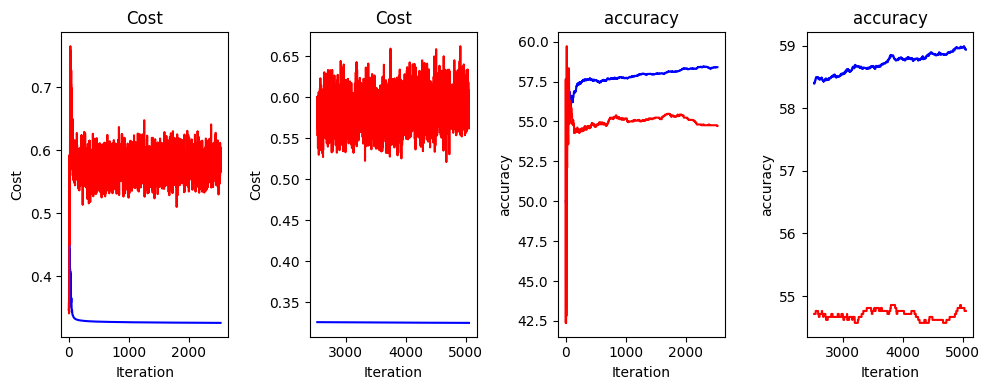

epoch 0: train cost 0.34657358 | dev cost 0.34657437 | train eval 50.00000000 | dev eval 42.38095238
epoch 100: train cost 0.32872228 | dev cost 0.36855082 | train eval 58.56526579 | dev eval 52.61904762
epoch 200: train cost 0.32302928 | dev cost 0.58947936 | train eval 59.10798775 | dev eval 53.42857143
epoch 300: train cost 0.32241309 | dev cost 0.54628764 | train eval 59.09407181 | dev eval 53.47619048
epoch 400: train cost 0.32214267 | dev cost 0.55194791 | train eval 59.09407181 | dev eval 53.52380952
epoch 500: train cost 0.32194588 | dev cost 0.51611686 | train eval 59.07319788 | dev eval 53.38095238
epoch 600: train cost 0.32176878 | dev cost 0.53261129 | train eval 59.11494573 | dev eval 53.09523810
epoch 700: train cost 0.32156477 | dev cost 0.54313710 | train eval 59.13581965 | dev eval 53.19047619
epoch 800: train cost 0.32142133 | dev cost 0.54660238 | train eval 59.11494573 | dev eval 53.47619048
epoch 900: train cost 0.32129735 | dev cost 0.57215989 | train eval 59.1079

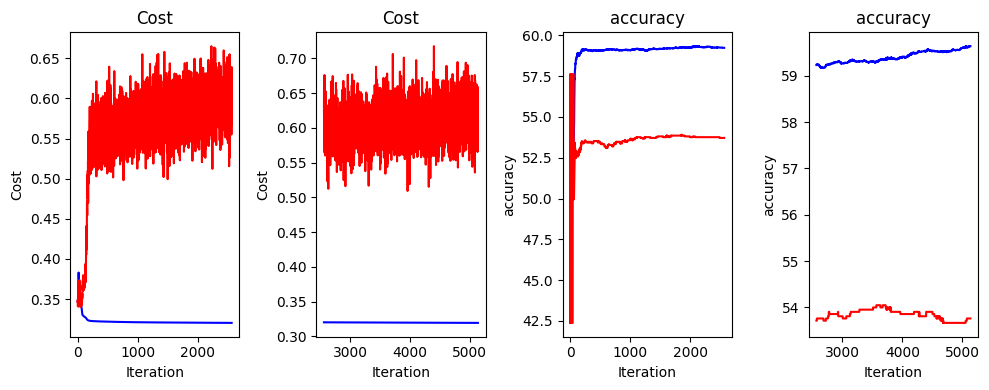

In [ ]:
p = [[0.5,0.7,1],[0.5,0.5,0.7,1]]
i = 0
for model in models:
    
    J_hist, dev_hist, train_eval_hist, dev_eval_hist = model.train(X_train=x_train_normalized, 
                                                                        Y_train=y_train, 
                                                                        X_dev=x_dev_normalized, 
                                                                        Y_dev=y_dev, 
                                                                        # batch_size=1024, 
                                                                        epoch=25000, 
                                                                        learning_rate=0.1, 
                                                                        # reg_lambda=1,
                                                                        k_prob=p[i],
                                                                        patience=50, 
                                                                        optimizer='Adam'
                                                                        )
    

    i+=1
    fig, axes = plt.subplots(1, 4, figsize=(10, 4))  # 1 row, 4 columns

    l = len(J_hist) 
    # First plot
    axes[0].plot(np.arange(l//2), J_hist[0:l//2], color="blue")
    axes[0].plot(np.arange(l//2), dev_hist[0:l//2], color="r")

    axes[0].set_title("Cost")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Cost")


    axes[1].plot(np.arange(l//2,l), J_hist[l//2:l], color="blue")
    axes[1].plot(np.arange(l//2, l), dev_hist[l//2:l], color="r")

    axes[1].set_title("Cost")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Cost")
    # Second plot
    axes[2].plot(np.arange(l//2), train_eval_hist[0:l//2], color="b")
    axes[2].plot(np.arange(l//2), dev_eval_hist[0:l//2], color="r")

    axes[2].set_title("accuracy")
    axes[2].set_xlabel("Iteration")
    axes[2].set_ylabel("accuracy")

    # Second plot
    axes[3].plot(np.arange(l//2, l), train_eval_hist[l//2:l], color="b")
    axes[3].plot(np.arange(l//2, l), dev_eval_hist[l//2:l], color="r")

    axes[3].set_title("accuracy")
    axes[3].set_xlabel("Iteration")
    axes[3].set_ylabel("accuracy")

    plt.tight_layout()  # Adjust spacing
    plt.show()
   

In [22]:
# for i in range(3):
#     start_idx = i*50000

#     cost = J_hist[i*50000:(i+1)*50000]
    # dev_cost = dev_hist[i*50000:(i+1)*50000]
    # train_eval = train_eval_hist[i*50000:(i+1)*50000]
    # dev_eval = dev_eval_hist[i*50000:(i+1)*50000]

    # plt.plot(np.arange(50000), cost)
    # plt.plot(np.arange(50000), dev_cost)
    # plt.show()

    # plt.plot(np.arange(50000), train_eval)
    # plt.plot(np.arange(50000), dev_eval)
    # plt.show()


In [23]:
for model in models:
    eval = model.evaluate(x_test_normalized, y_test)
    print(eval)

56.00000000000001
55.61904761904762
